### IDs:
Insert yours IDs to the cell below

ID #1: 203909320

ID #2: 311132468


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
from  statistics import median
from scipy.optimize import minimize
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
import random
import time
from scipy.stats import norm

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [2]:
n = 50

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥,𝑦) = -0.98
𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥_𝑛−1,𝑦_𝑛−1) = -0.1940
Does 𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥,𝑦) < 0.9 and 𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥𝑛−1,𝑦𝑛−1)>−0.2 ? 
**True** 


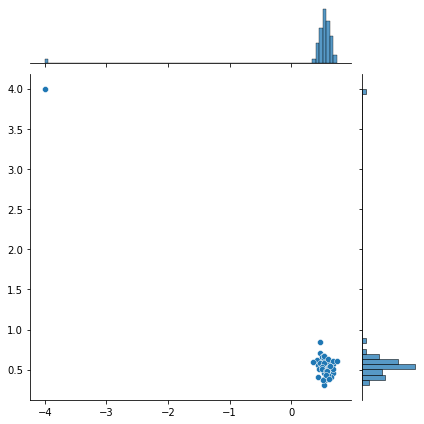

In [3]:
def pear_point_two(n):
    x = np.random.random_sample(n)
    y = np.random.random_sample(n)
    means = [x.mean(), y.mean()]  
    stds = [x.std() / 3, y.std() / 3]
    corr = -0.2         # correlation
    covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
            [stds[0]*stds[1]*corr,           stds[1]**2]] 
    m = np.random.multivariate_normal(means, covs, n).T
    return m
m = pear_point_two(n-1)
while stats.pearsonr(m[0], m[1])[0]<-0.2:
    #print("entered") #simple check if loop is needed -> its needed...
    m = pear_point_two(n-1)
stats.pearsonr(m[0], m[1])[0]
x = np.append(m[0],-4); y = np.append(m[1],4)
print("𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥,𝑦) = {:.2f}".format(stats.pearsonr(x, y)[0]))
print("𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥_𝑛−1,𝑦_𝑛−1) = {:.4f}".format(stats.pearsonr(x[:n-1], y[:n-1])[0]))
print("Does 𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥,𝑦) < 0.9 and 𝑃𝑒𝑎𝑟𝑠𝑜𝑛(𝑥𝑛−1,𝑦𝑛−1)>−0.2 ? \n**{0}** ".format(stats.pearsonr(x, y)[0] < - 0.9 and stats.pearsonr(x[:n-1], y[:n-1])[0] > -0.2))
sns.jointplot(x=x,y=y)
# pd.DataFrame([m[0],m[1]],columns = ['Name', 'Age'])

In [4]:
df = pd.DataFrame(data = [x,y]).T;df.columns = ['X','Y']
df

,X,Y
0,0.500416,0.604394
1,0.467950,0.703453
2,0.492599,0.503204
3,0.599155,0.543647
4,0.433736,0.608712
5,0.594642,0.522754
6,0.422603,0.621010
7,0.527561,0.672845
8,0.427441,0.561594
9,0.464126,0.578906


#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

 τ(x,y) > ρ(x,y) + 0.45:
0.0384 > -0.4142 + 0.45:
0.0384 > 0.0358 ?
      True 


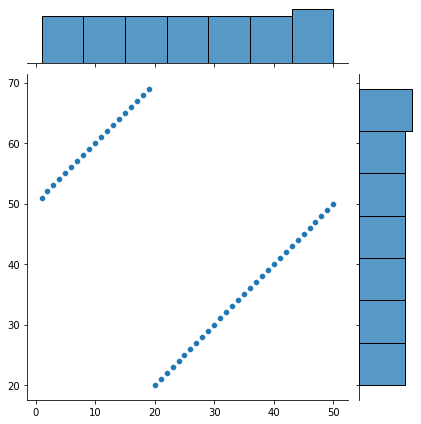

In [5]:
q = np.arange(1,n+1)
w = np.concatenate((np.arange(1,20)+n,np.arange(20,n+1)))
print(" τ(x,y) > ρ(x,y) + 0.45:")
print("{:.4f} > {:.4f} + 0.45:".format(stats.kendalltau(q,w)[0],stats.spearmanr(q, w)[0]))
print("{:.4f} > {:.4f} ?".format(stats.kendalltau(q,w)[0],stats.spearmanr(q, w)[0] + 0.45))
print("      {0} ".format(stats.kendalltau(q,w)[0] > (stats.spearmanr(q, w)[0] + 0.45)))

sns.jointplot(x=q,y=w)

In [6]:
df = pd.DataFrame(data = [q,w]).T;df.columns = ['X','Y']
df

,X,Y
0,1,51
1,2,52
2,3,53
3,4,54
4,5,55
5,6,56
6,7,57
7,8,58
8,9,59
9,10,60


#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

 τ(x,y) < ρ(x,y) - 0.45:
-0.0384 < 0.4142 - 0.45:
-0.0384 < -0.0358 ?
      True 


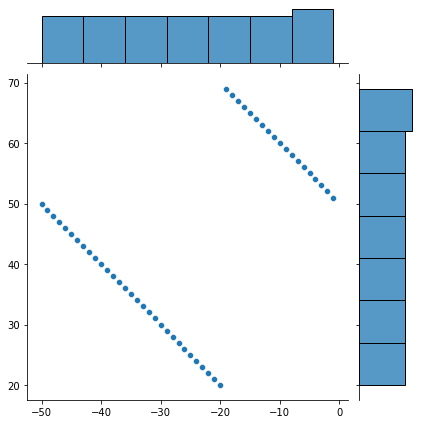

In [7]:
q = -np.arange(1,n+1)
w = np.concatenate((np.arange(1,20)+n,np.arange(20,n+1)))
print(" τ(x,y) < ρ(x,y) - 0.45:")
print("{:.4f} < {:.4f} - 0.45:".format(stats.kendalltau(q,w)[0],stats.spearmanr(q, w)[0]))
print("{:.4f} < {:.4f} ?".format(stats.kendalltau(q,w)[0],stats.spearmanr(q, w)[0] - 0.45))
print("      {0} ".format(stats.kendalltau(q,w)[0] < (stats.spearmanr(q, w)[0] - 0.45)))

sns.jointplot(x=q,y=w)

In [8]:
df = pd.DataFrame(data = [q,w]).T;df.columns = ['X','Y']
df

,X,Y
0,-1,51
1,-2,52
2,-3,53
3,-4,54
4,-5,55
5,-6,56
6,-7,57
7,-8,58
8,-9,59
9,-10,60


#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

 Pearson(x,y) < ρ(x,y) – 0.6:
0.2189 < 1.0000 - 0.6:
0.2189 < 0.4000 ?
      True 


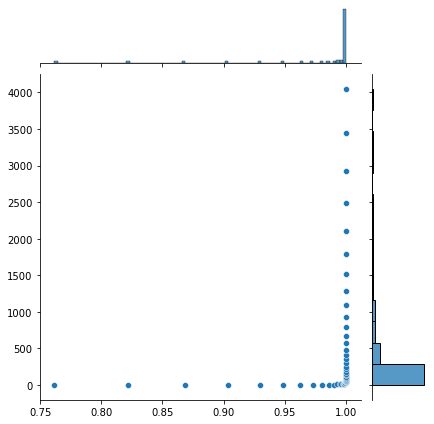

In [9]:
q = np.tanh(np.linspace(1,9,n))
w = np.sinh(np.linspace(1,9,n))
# q = np.arange(1,n+1)
# w = np.sinh(q)
print(" Pearson(x,y) < ρ(x,y) – 0.6:")
print("{:.4f} < {:.4f} - 0.6:".format(stats.pearsonr(q,w)[0],stats.spearmanr(q, w)[0]))
print("{:.4f} < {:.4f} ?".format(stats.pearsonr(q,w)[0],stats.spearmanr(q, w)[0] - 0.6))
print("      {0} ".format(stats.pearsonr(q,w)[0] < (stats.spearmanr(q, w)[0] - 0.6)))

sns.jointplot(x=q,y=w)

In [10]:
df = pd.DataFrame(data = [q,w]).T;df.columns = ['X','Y']
df

,X,Y
0,0.761594,1.175201
1,0.822101,1.443951
2,0.868399,1.751276
3,0.903287,2.105386
4,0.929277,2.515741
5,0.948471,2.993303
6,0.962557,3.550831
7,0.972846,4.203219
8,0.980336,4.967895
9,0.985775,5.865287


#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

  Pearson(x,y) > ρ(x,y) + 1.2:
0.6150 > -0.8824 + 1.2:
0.6150 > 0.3176 ?
      True 


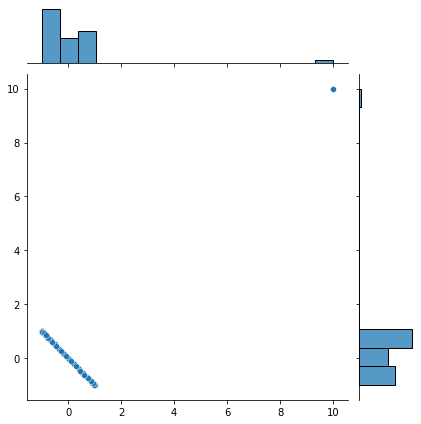

In [11]:
q = np.concatenate((np.cos(np.linspace(1,10,n-1)),[10]))
w = np.concatenate((np.sin(np.linspace(10,1,n-1)),[10]))
print("  Pearson(x,y) > ρ(x,y) + 1.2:")
print("{:.4f} > {:.4f} + 1.2:".format(stats.pearsonr(q,w)[0],stats.spearmanr(q, w)[0]))
print("{:.4f} > {:.4f} ?".format(stats.pearsonr(q,w)[0],stats.spearmanr(q, w)[0] + 1.2))
print("      {0} ".format(stats.pearsonr(q,w)[0] > (stats.spearmanr(q, w)[0] + 1.2)))

sns.jointplot(x=q,y=w)

In [12]:
df = pd.DataFrame(data = [q,w]).T;df.columns = ['X','Y']
df

,X,Y
0,0.540302,-0.544021
1,0.373980,-0.378081
2,0.194548,-0.198887
3,0.008296,-0.012722
4,-0.178246,0.173889
5,-0.358540,0.354405
6,-0.526266,0.522498
7,-0.675545,0.672275
8,-0.801144,0.798487
9,-0.898659,0.896709


#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

In the scientific literature it is mentioned that $|τ(x,y) - ρ(x,y) |< \frac{1}{2}$ thus it is impossible to generate two permutations that will yield a difference bigger than $ \frac{1}{2}$ hence a differnce between kendall and spearman correlation of 1.2 is not possible to generate.

the following permutation gives $\lim_{\large|τ(x,y) - ρ(x,y) |\to\frac{1}{2}}$ when $ \lim_{\large n\to\infty}$ :

$$X = \sum_{i=1}^{2n}i$$ $$ Y = concat(  \sum_{i=0}^{n-1}n-i \:{\large,}  \sum_{i=0}^{n-1}2n-i) $$

In [13]:
num = [10,50,100,200,1000]
for item in num:
    f = item
    x = []; y = []
    for i in range(1,item+1):
        x.append(i)
        y.append(f)
        f-=1
    f= item*2
    for i in range(item,2*item +1):
        x.append(i)
        y.append(f)
        f-=1
    x,y
    t = stats.kendalltau(x,y)[0]
    s = stats.spearmanr(x, y)[0]
    print("For n = {0}, |τ(x,y) - ρ(x,y) | ={1} ".format(item,np.abs(t-s)))

For n = 10, |τ(x,y) - ρ(x,y) | =0.43605647114419044 
For n = 50, |τ(x,y) - ρ(x,y) | =0.4893312498879423 
For n = 100, |τ(x,y) - ρ(x,y) | =0.4948289528077013 
For n = 200, |τ(x,y) - ρ(x,y) | =0.4974567470408437 
For n = 1000, |τ(x,y) - ρ(x,y) | =0.49949825399525305 


### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


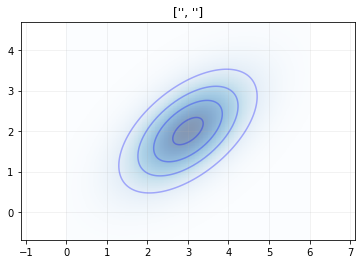

In [14]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_2d_Gaussian_pdf(means, cov, name=["",""]):
    n = 300
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.title(name)
    plt.xlabel('{}'.format(name[0]))
    plt.ylabel('{}'.format(name[1]))
    #ax.set_ylabel('volts')
    plt.show()
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [15]:
heart = pd.DataFrame(pd.read_csv("heart.csv", low_memory=False, sep ="\t"))
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [16]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Categorical:
sex (0 = female; 1 = male)
fbs: Fasting blood sugar > 120 mg/dl
exang: Exercise induced angina (0 = no; 1 = yes)
cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)
restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)
slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)
thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)

Numeric:
ca: number of major vessels (0-3) colored by flourosopy
age
oldpeak: ST depression induced by exercise relative to rest
trestbps: Resting blood pressure
chol: Serum cholestoral in mg/dl
thalach: Maximum heart rate achieved during thalium stress test

In [17]:
nums = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
catgs = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

In [18]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorial_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']


In [19]:
heart[nums] = heart[nums].fillna(heart.mean().iloc[0])
heart[catgs] = heart[catgs].fillna(heart.mode().iloc[0])
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.686469,0.953795,130.133132,242.172736,0.148515,0.524752,148.308777,0.326733,1.920954,1.399340,0.729373,2.313531,0.544554
std,8.963533,0.464696,1.031544,20.434195,58.112372,0.356198,0.519693,25.313175,0.469794,6.905384,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,54.389831,54.389831,0.000000,0.000000,54.389831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,208.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,54.389831,2.000000,4.000000,3.000000,1.000000


In [20]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
table= pd.DataFrame(columns=["Feature","Confidence interval: Lower bound","Confidence interval: Upper bound","mean age with diagnosis of heart disease=False","mean age with diagnosis of heart disease=True","95% Confidence"])
i=0
for j in nums:
    i=i+1
    x_1 = heart.loc[heart['target'] == 0, j]
    x_2 = heart.loc[heart['target'] == 1, j]
    n1, n2, alpha = len(x_1), len(x_2), 0.05                       
    s1, s2 = np.var(x_1, ddof=1), np.var(x_2, ddof=1)              
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))    
    deg = n1 + n2 - 2                                           
    t = stats.t.ppf(1 - alpha/2, deg)                             
    lower = (np.mean(x_1) - np.mean(x_2)) - t * np.sqrt(1 / len(x_1) + 1 / len(x_2)) * s
    upper = (np.mean(x_1) - np.mean(x_2)) + t * np.sqrt(1 / len(x_1) + 1 / len(x_2)) * s
    if upper*lower>0:
        Confidence="Yes",(upper*lower).round(2)
    else:
        Confidence="No",(upper*lower).round(2)
    table.loc[i] = [j,lower,upper,x_1.mean(),x_2.mean(),Confidence]
table.set_index('Feature')

,Confidence interval: Lower bound,Confidence interval: Upper bound,mean age with diagnosis of heart disease=False,mean age with diagnosis of heart disease=True,95% Confidence
Feature,,,,,
age,2.173870,6.139611,56.653402,52.496662,"(Yes, 13.35)"
trestbps,2.245306,11.408128,133.850651,127.023934,"(Yes, 25.61)"
chol,-5.167228,21.197670,246.537460,238.522239,"(No, -109.53)"
thalach,-24.895425,-14.275848,137.643331,157.228968,"(Yes, 355.4)"
oldpeak,-0.062874,3.059016,2.736735,1.238665,"(No, -0.19)"


Text(0.5, 1.0, 'correlation matrix')

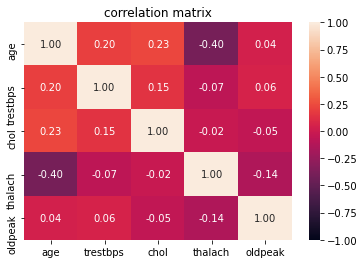

In [22]:
sns.heatmap(heart[nums].corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('correlation matrix')

In [23]:
df = heart[nums].corr()
df = df [df < 1]

age - ca produce the highest positive correlation : 0.22776518020673203


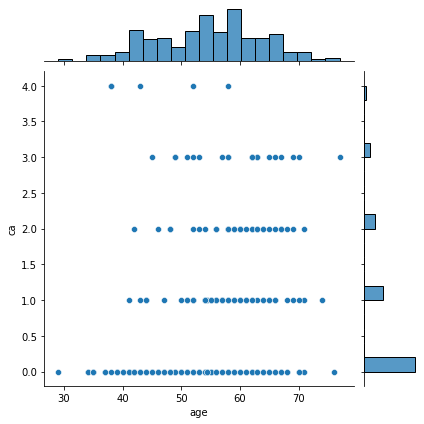

In [24]:
print("age - ca produce the highest positive correlation : {}".format(df.max().max()))
sns.jointplot(x=heart['age'], y=heart['ca'], marginal_kws=dict(bins=20))

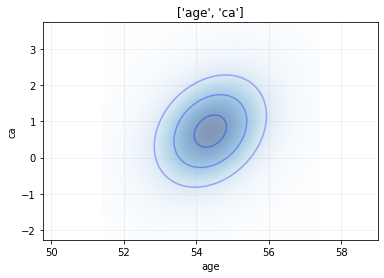

In [25]:
l_1=['age','ca']
means=[heart[l_1[0]].mean(),heart[l_1[1]].mean()]
cov=heart[l_1].corr().values.tolist()
plot_2d_Gaussian_pdf(means, cov,l_1)


age - thalach produce the highest positive correlation : -0.3971728515760083


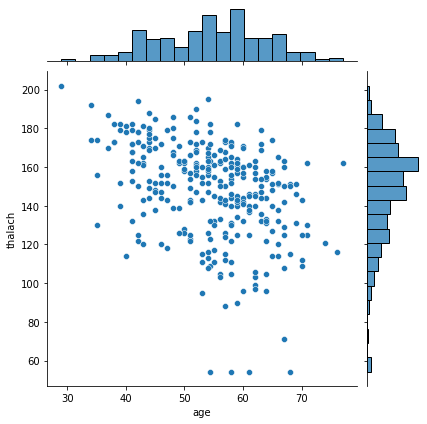

In [26]:
print("age - thalach produce the highest positive correlation : {}".format(df.min().min()))
sns.jointplot(x=heart['age'], y=heart['thalach'], marginal_kws=dict(bins=20))

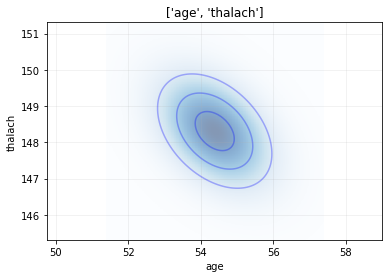

In [27]:
l_2=['age','thalach']
means=[heart[l_2[0]].mean(),heart[l_2[1]].mean()]
cov=heart[l_2].corr().values.tolist()
plot_2d_Gaussian_pdf(means, cov,l_2)

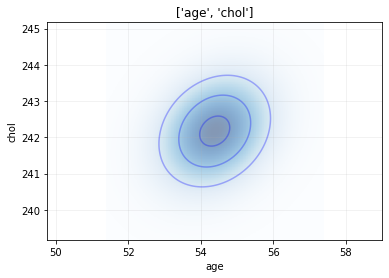

In [28]:
l_1=['age','chol']
means=[heart[l_1[0]].mean(),heart[l_1[1]].mean()]
cov=heart[l_1].corr().values.tolist()
plot_2d_Gaussian_pdf(means, cov,l_1)

In [29]:
from scipy.stats import lognorm
def MLE_graph(k,k_name,model):
    x_1 = np.linspace(np.min(k)-10, np.max(k)+20, 1000)
    if model==1:
        shape, loc, scale = lognorm.fit(k)
        pdf = lognorm.pdf(x_1,0, loc = loc, scale = scale)
    else:
        E_x, s = norm.fit(k)
        pdf = norm.pdf(x_1, loc= E_x, scale = s)
    plt.figure(figsize=(10, 5))     
    sns.distplot(k,bins = 13, kde=False, label="emp")
    bin_width = (np.max(k) - np.min(k)) / 13     
    plt.plot(x_1, 300*bin_width*pdf, 'black', lw=3, label="mle")
    plt.title(k_name)
    plt.legend()
    plt.show()

Model=normal


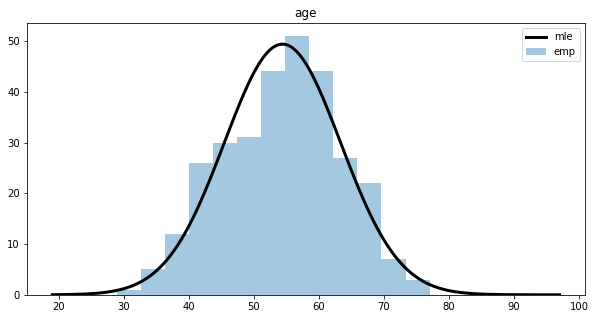

Model=normal


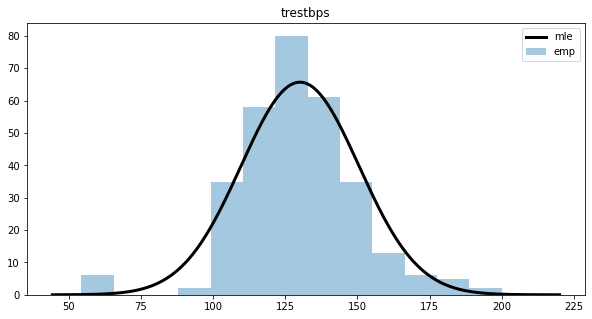

Model=normal


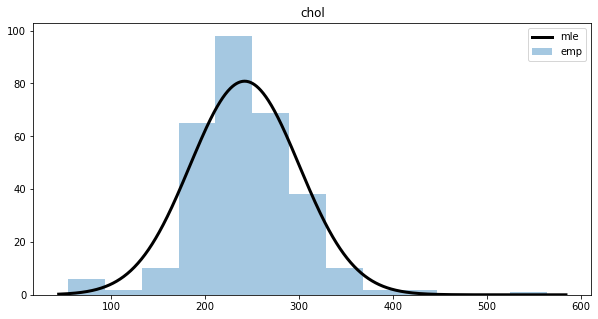

Model=normal


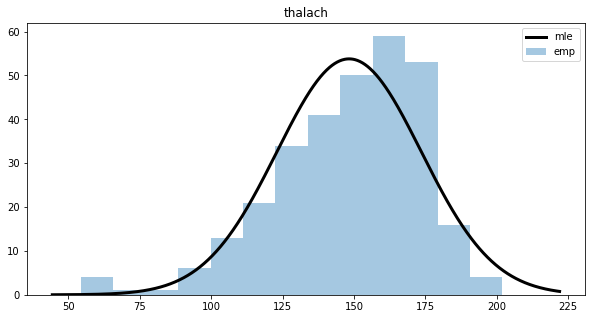

Model=normal


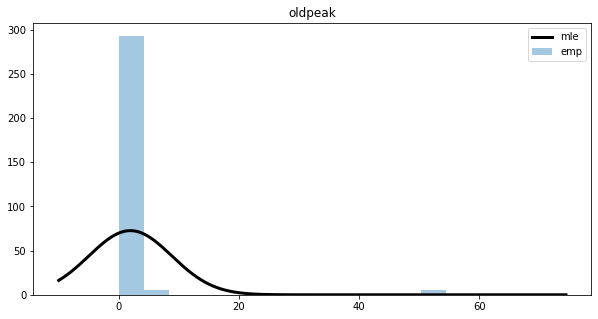

In [30]:
for k in nums:
    print("Model=normal")
    MLE_graph(heart[k].to_list(),k,0)

Model=Lognormal


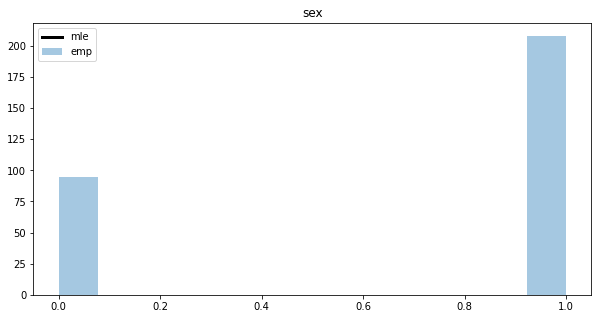

Model=Lognormal


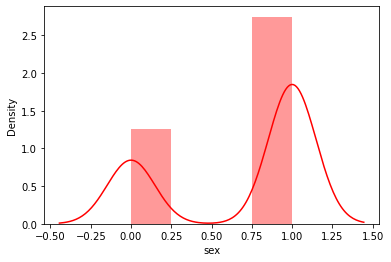

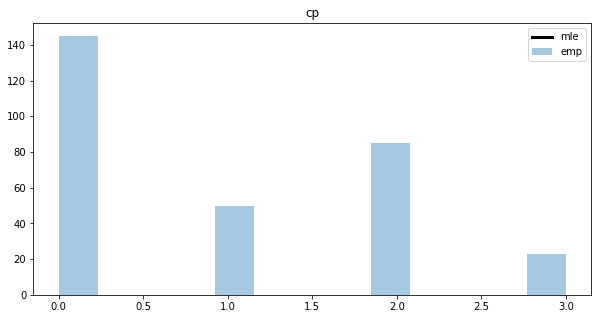

Model=Lognormal


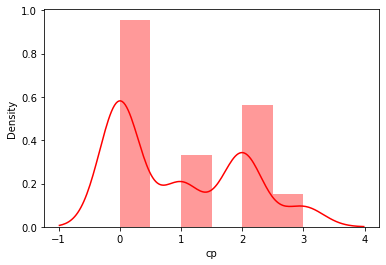

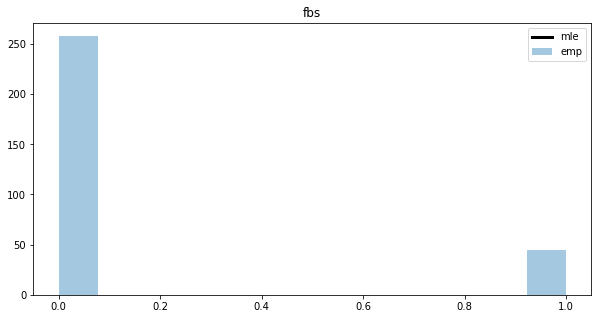

Model=Lognormal


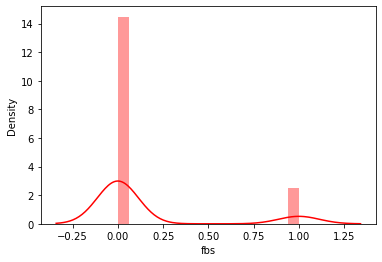

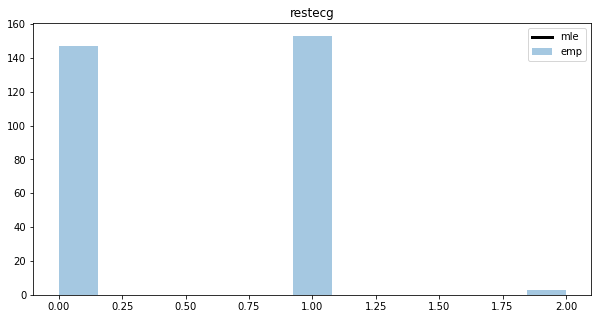

Model=Lognormal


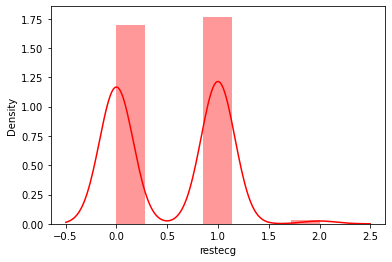

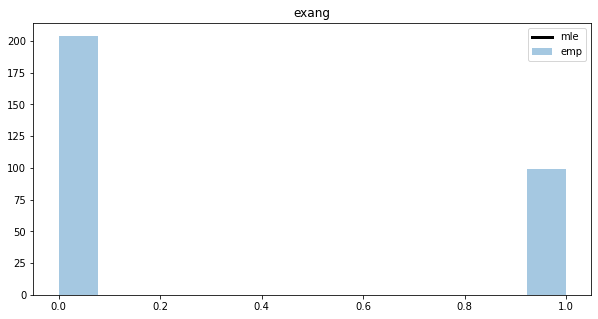

Model=Lognormal


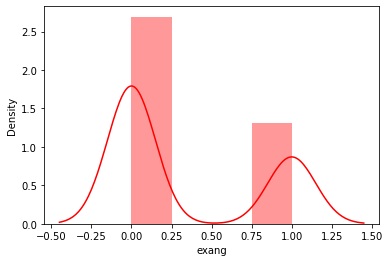

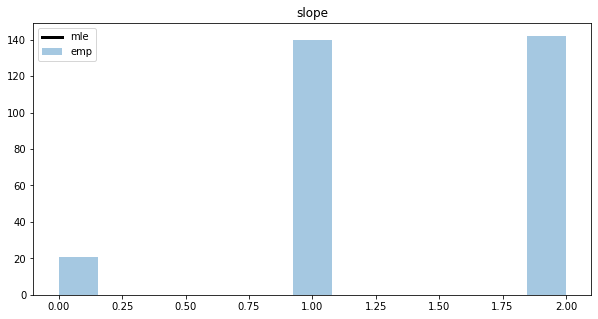

Model=Lognormal


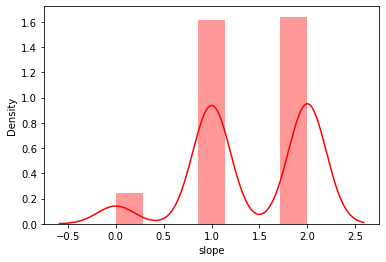

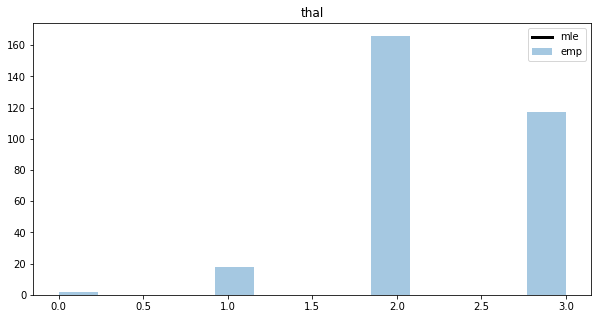

Model=Lognormal


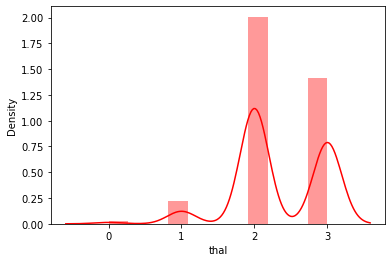

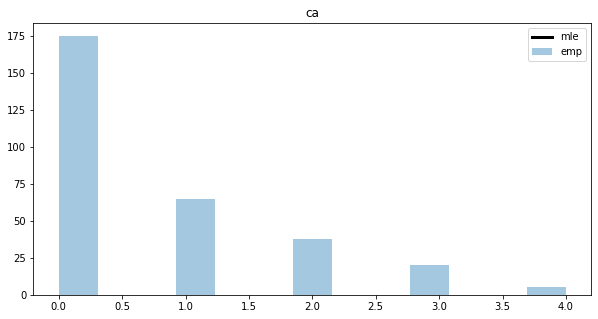

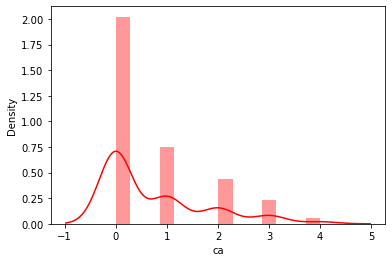

In [31]:
for k in catgs:
        print("Model=Lognormal")
        MLE_graph(heart[k].to_list(),k,1)
        sns.distplot(heart[k],color = 'r')

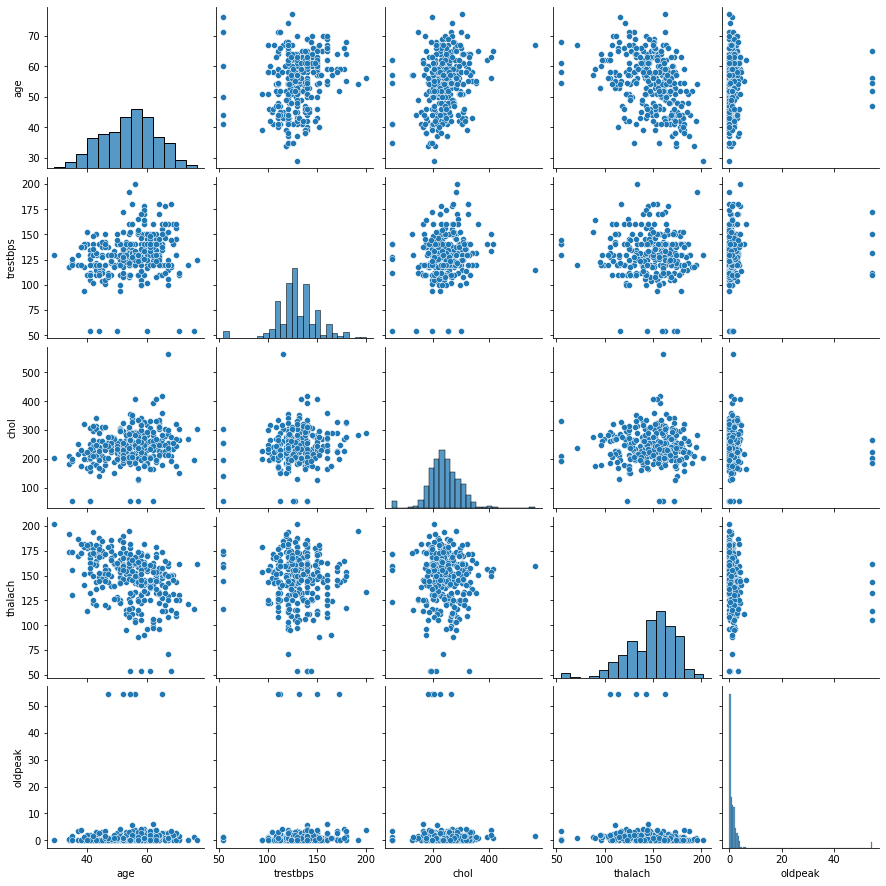

In [32]:
sns.pairplot(heart[nums])

Text(0.5, 1.0, 'corr matrix males')

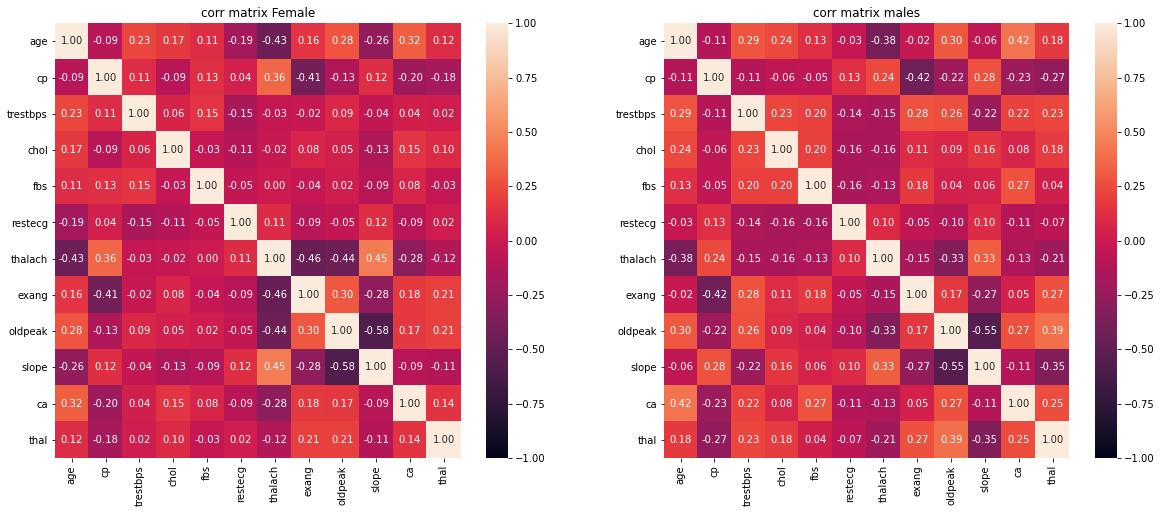

In [33]:
sex_groups = heart.groupby(by='sex')
males = sex_groups.get_group(1)
females = sex_groups.get_group(0)
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
j=0
data_names=["males","females"]
for i in [males,females]:
    plt.title('correlation matrix {}'.format(data_names[j]))
    sns.heatmap(i.drop(columns=['target','sex']).corr(method = 'spearman'), vmin=-1, vmax=1, annot=True, fmt='.2f',ax=axes[j])
    j=j+1
axes[0].set_title('corr matrix {}'.format("Female"))
axes[1].set_title('corr matrix {}'.format("males"))

Text(0.5, 1.0, 'corr matrix healthy')

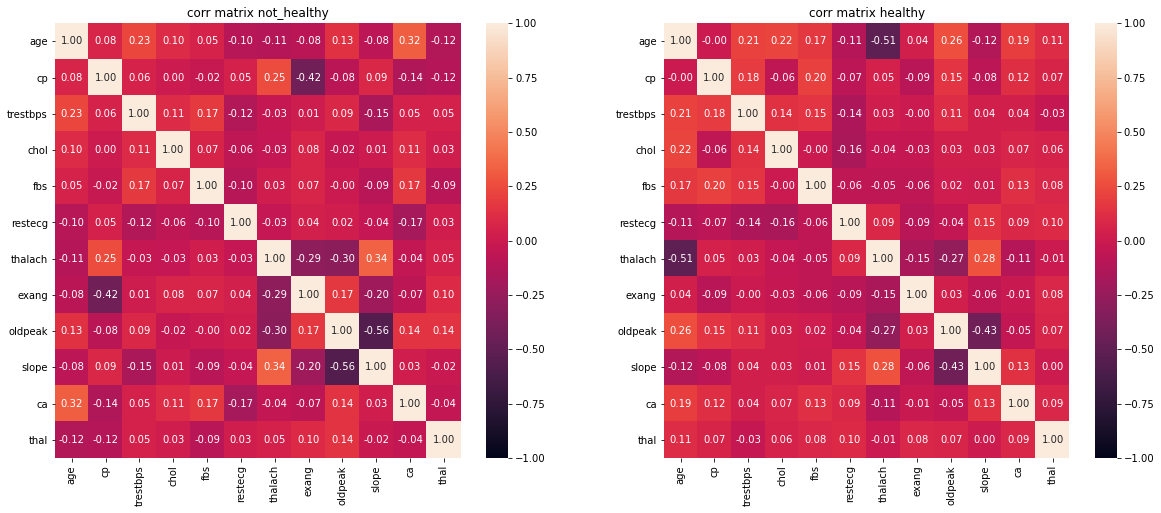

In [34]:
healthy_groups = heart.groupby(by='target')
not_healthy = healthy_groups.get_group(1)
healthy = healthy_groups.get_group(0)
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
j=0
data_names=["healthy","not_healthy"]
for i in [healthy,not_healthy]:
    plt.title('correlation matrix {}'.format(data_names[j]))
    sns.heatmap(i.drop(columns=['target','sex']).corr(method = 'spearman'), vmin=-1, vmax=1, annot=True, fmt='.2f',ax=axes[j])
    if data_names[j] == "healthy":
        df_healthy = healthy.drop(columns=['target','sex']).corr(method = 'spearman')
    else:
        df_not_healthy= not_healthy.drop(columns=['target','sex']).corr(method = 'spearman')
    j=j+1
axes[0].set_title('corr matrix {}'.format("not_healthy"))
axes[1].set_title('corr matrix {}'.format("healthy"))

-0.5144144295570119,-0.5144144295570119


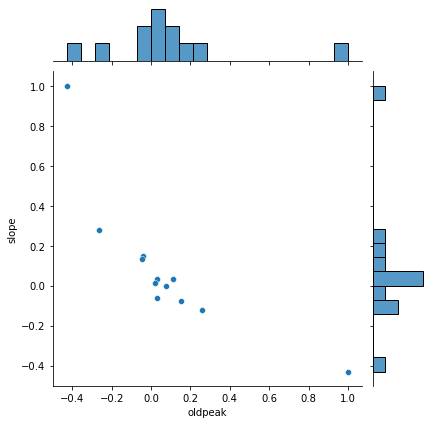

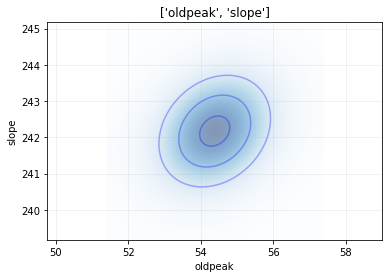

In [35]:
df = df_not_healthy[nums]
a =  df > 0.5
b = df < -0.5
c = df < 1
df = df[a | b]
df = df [c]
print("{},{}".format(df.min().min(),df.max().max()))
sns.jointplot(x=df_not_healthy['oldpeak'], y=df_not_healthy['slope'], marginal_kws=dict(bins=20))
l=['oldpeak',"slope"]
plot_2d_Gaussian_pdf(means, cov,l)

-0.5633279181125154,-0.5633279181125154


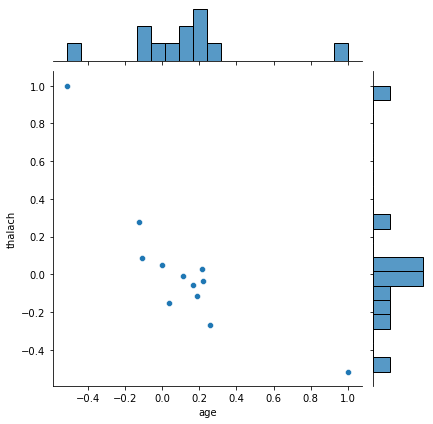

In [36]:
df = df_healthy
a =  df > 0.5
b = df < -0.5
c = df < 1
df = df[a | b]
df = df [c]
print("{},{}".format(df.min().min(),df.max().max()))
sns.jointplot(x=df_not_healthy['age'], y=df_not_healthy['thalach'], marginal_kws=dict(bins=20))

For each numerical feature
plot violin distribution : feature |  age_level | based on the taget value (0=healthy and 1=disease.)

<Figure size 720x432 with 0 Axes>

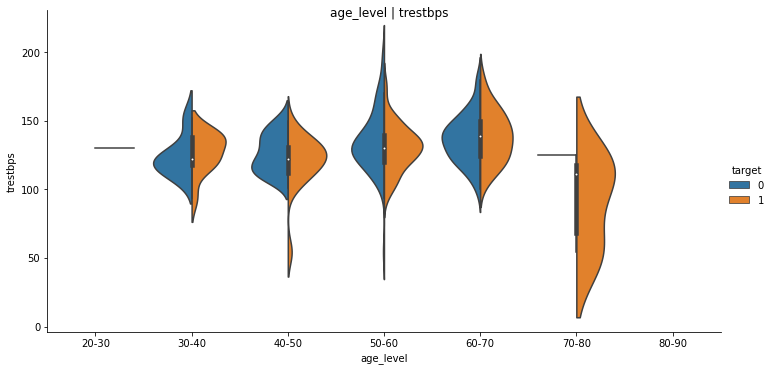

<Figure size 720x432 with 0 Axes>

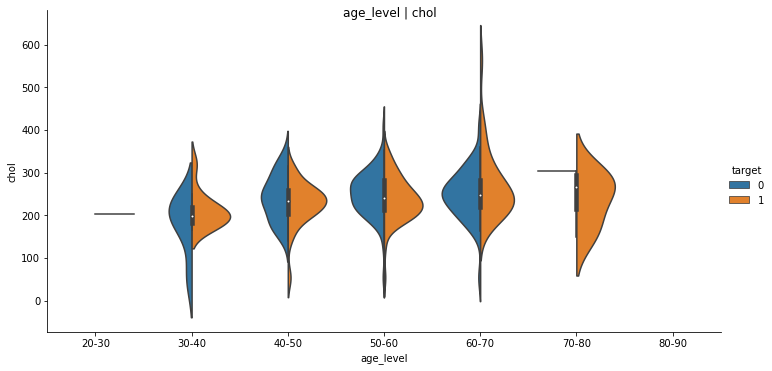

<Figure size 720x432 with 0 Axes>

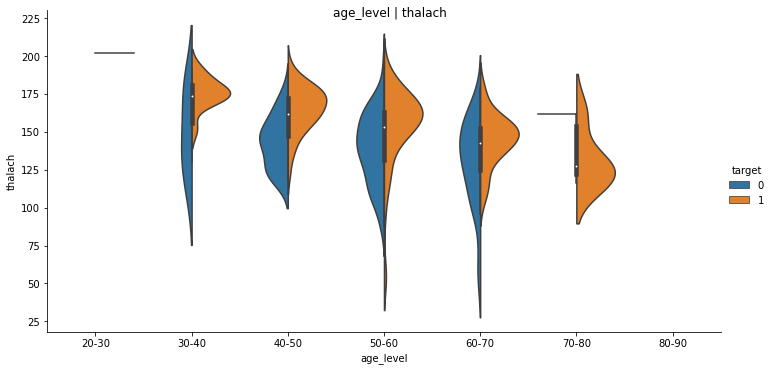

<Figure size 720x432 with 0 Axes>

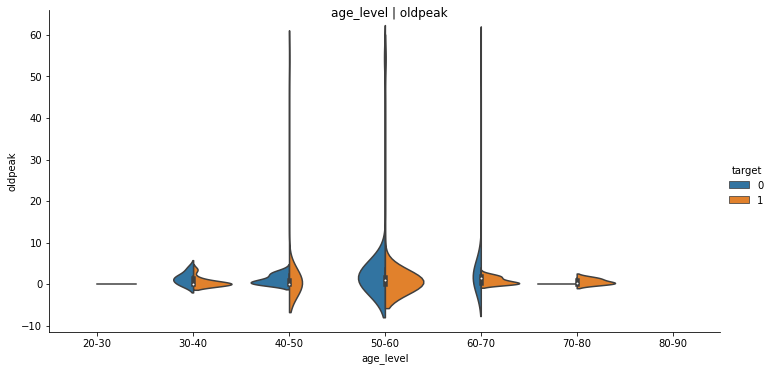

In [37]:
heart_temp = heart.copy()
heart_temp['age_level'] = pd.cut(heart_temp['age'], bins=[20,30,40,50,60,70,80,90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
for i in nums[1:]:
    fig=plt.figure(figsize=(10,6))
    f = sns.catplot(x='age_level', y=i, hue='target', kind="violin", split=True, data=heart_temp, aspect=2);
    f.fig.suptitle("age_level | {}".format(i))

there is any relationship between the level age range and chol range and be healthy? and what the diff for each group?
boxplot distribution : chol |  age_level | based on the taget value (0=healthy and 1=disease.)


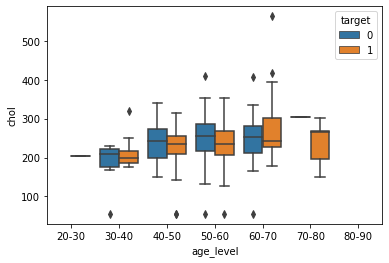

In [38]:
print("there is any relationship between the level age range and chol range and be healthy? and what the diff for each group?")
print("boxplot distribution : chol |  age_level | based on the taget value (0=healthy and 1=disease.)")
ax = sns.boxplot(y='chol', x='age_level',hue="target", data=heart_temp)

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

$$ X \sim N(0,1)  $$
$$ P(X > \infty) = 1 - \Phi{(\infty)} $$
we recall that CDF of a distribution is  1 when x tends to $\infty$ :
$$ \lim_{x\to\infty} \Phi{(x)} = 1  $$
now lets use this fact to apply the limit:
$$\lim_{x\to\infty} e^{t\cdot \infty}(1 - \Phi{(\infty)})= \infty \cdot 0   $$
Not good, we get undefined limit. Lets rearrange the functions like that:
$$ \lim_{x\to\infty} e^{tx}(1 - \Phi{(x)}) = \lim_{x\to\infty} \frac{1 -\Phi(x)}{e^{-tx}}$$
Applying L'hopital rule:
$$ \lim_{x\to\infty} \frac{\frac{d}{dx}(1 -\Phi(x))}{\frac{d}{dx}(e^{-tx})} =  \lim_{x\to\infty} \frac{ -\Phi'(x)}{-t\cdot e^{-tx}}$$

By definition $\Phi'(x)$ is the standard normal PDF which is: $\large f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}$

So we have the following limit:
$$ \lim_{x\to\infty} \frac{ -\Phi'(x)}{-t\cdot e^{-tx}} =  \lim_{x\to\infty} \frac{ \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}}{t\cdot e^{-tx}} =  \lim_{x\to\infty} \large \frac{1}{t\cdot\sqrt{2\pi}}e^{tx-\frac{1}{2}x^2} = 0$$

Note that with the help of arithmetics of infinity limits we get: $$ \lim_{x\to\infty} tx-\frac{1}{2}x^2 = \lim_{x\to\infty} x^2\cdot(\frac{t}{x} -\frac{1}{2}) = \infty \cdot -\frac{1}{2} = -\infty  $$

and to conclude: 
$$ \lim_{x\to\infty} \large \frac{1}{t\cdot\sqrt{2\pi}}e^{tx-\frac{1}{2}x^2} = \large \frac{1}{t\cdot\sqrt{2\pi}}e^{-\infty} \rightarrow 0$$

So as we proved , standard normal distribution does not have heavy right tail because $ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=0 $

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

As shown in 3.A, lets start from the state of which we already rearranged the functions and applied L'hopital rule:

$$ \lim_{x\to\infty} \frac{\frac{d}{dx}(1 -\Phi(x))}{\frac{d}{dx}(e^{-tx})} = \frac{\Phi'(x)}{t\cdot e^{-tx}}$$
By definition $\Phi'(x)$ is the standard Lognormal PDF which is: $\large f(x)=\frac{1}{x\sqrt{2\pi}}e^{-\frac{1}{2}(lnx)^2}$

So now we get:
$$\lim_{x\to\infty} \frac{e^{-\frac{1}{2}(lnx)^2}}{t\cdot x\sqrt{2\pi} \cdot e^{-tx}} = \large \frac{e^{tx-\frac{1}{2}(lnx)^2}}{t\cdot x\sqrt{2\pi}}$$

No choice, applying L'hopital rule again:
$$\lim_{x\to\infty}  \frac{\frac{d}{dx}(e^{tx-\frac{1}{2}(lnx)^2})}{\frac{d}{dx}(t\cdot x\sqrt{2\pi)}} = \lim_{x\to\infty} \large \frac{(t - \frac{lnx}{x})e^{tx-\frac{1}{2}(lnx)^2}}{t\cdot \sqrt{2\pi}}$$

note that $$\lim_{x\to\infty} (tx-\frac{1}{2}(lnx)^2) = \lim_{x\to\infty} x(t - \frac{1}{2x}(lnx)^2) = \infty\cdot(t-0) = \infty$$

and thats because $\lim_{x\to\infty} \frac{1}{2x}(lnx)^2 \overset{\mathrm{L'hopital}}{=} \lim_{x\to\infty} \frac{\frac{1}{x}lnx}{1} \overset{\mathrm{L'hopital}}{=} \lim_{x\to\infty} \frac{1}{x} = 0$

note as well: $ \large{\lim_{x\to\infty} (t-\frac{lnx}{x}) = t} $ because $ \lim_{x\to\infty} \frac{lnx}{x} \overset{\mathrm{L'hopital}}{=}  \lim_{x\to\infty} \frac{\frac{1}{x}}{1} = 0$

now we can conclude: $$\lim_{x\to\infty} \large \frac{(t - \frac{lnx}{x})e^{tx-\frac{1}{2}(lnx)^2}}{t\cdot \sqrt{2\pi}} =  \frac{t\cdot e^{\infty}}{t\cdot\sqrt{2\pi}} = \infty$$


So as we proved , standard lognormal distribution does  have heavy right tail because $ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)= \infty $

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [39]:
T = np.array([[0.4 , 0.2 , 0.1 ,0 , 0.1 , 0.2],
[0.2 , 0.4 , 0.2 , 0.1 , 0 , 0.1], 
[0.1 , 0.2 , 0.4 , 0.2 , 0.1 , 0] ,
[0 , 0.1 , 0.2 , 0.4 , 0.2 , 0.1] ,
[0.1 , 0 , 0.1 , 0.2 , 0.4 , 0.2],
[0.2 , 0.1 , 0 , 0.1 , 0.2 , 0.4]])

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.A answer:
1.i expect the average value of all 30 numbers in a given trajectory to tend to 3.5 as for fair 6-sided die, the expected value of the number rolled is 3.5 - so does the markovian dice rolling result, after a large number of trials.

In [40]:
l = 1000; n = 30

In [41]:
def trajectory(n,T): 
    mt = pd.DataFrame(T,columns = [1,2,3,4,5,6],index = [1,2,3,4,5,6])
    traj = np.zeros(n)
    prob = []
    traj[0] = np.random.choice([1,2,3,4,5,6]) # if not given probability - picks uniformly according to 
    prob.append(1/6) 
    for i in range(1,n):
        ps = mt[traj[i-1]].to_numpy()
        traj[i] = np.random.choice([1,2,3,4,5,6], p = ps)
        prob.append(mt[traj[i-1]][traj[i]])
    return traj, prob

In [42]:
traj_1 = np.zeros((l,n)); prob_1 = np.zeros((l,n))
for i in range(l):
    traj_1[i],prob_1[i] = trajectory(n,T)

The average value of each such trajectory will be presented as a dataframe:

In [43]:
pd.DataFrame(data = traj_1.mean(axis = 1), columns = ["Average"])

,Average
0,3.233333
1,3.900000
2,4.600000
3,3.500000
4,4.700000
...,...
995,3.266667
996,3.600000
997,3.400000
998,3.900000


***The distribution tends to Normal Distribution***


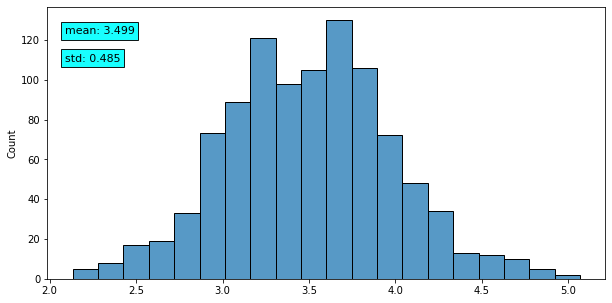

In [44]:
plt.rcParams['figure.figsize'] = (10.0,5.0)
hst_1 = sns.histplot(traj_1.mean(axis = 1) ,bins=20)
mean_t_1 =round(traj_1.mean(axis = 1).mean(),3)
std_t_1 = round(traj_1.mean(axis = 1).std(),3)
x_min,x_max=hst_1.get_xlim()
y_min,y_max=hst_1.get_ylim()
plt.text(x_min*1.05, y_max-y_max/5,f'std: {std_t_1}' ,color='black',size=11, bbox=dict(facecolor='cyan', alpha=0.9))
plt.text(x_min*1.05, y_max-y_max/10,f'mean: {mean_t_1}' ,color='black',size=11, bbox=dict(facecolor='cyan', alpha=0.9))
print("***The distribution tends to Normal Distribution***")

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.B answer:
1.i expect the average value of all 500 numbers in a given trajectory to tend to 3.5 better than 30 numbers trajectory because after a large number of trials the expected value gets closer and closer to the expected value of a fair die - 3.5

In [45]:
l = 1000; n = 500

In [46]:
def trajectory(n,T): 
    mt = pd.DataFrame(T,columns = [1,2,3,4,5,6],index = [1,2,3,4,5,6])
    traj = np.zeros(n)
    prob = []
    traj[0] = np.random.choice([1,2,3,4,5,6]) # if not given probability - picks uniformly according to 
    prob.append(1/6) 
    for i in range(1,n):
        ps = mt[traj[i-1]].to_numpy()
        traj[i] = np.random.choice([1,2,3,4,5,6], p = ps)
        prob.append(mt[traj[i-1]][traj[i]])
    return traj, prob

In [47]:
traj_2 = np.zeros((l,n)); prob_2 = np.zeros((l,n))
for i in tqdm(range(l)):
    traj_2[i],prob_2[i] = trajectory(n,T)

The average value of each such trajectory will be presented as a dataframe:

In [48]:
pd.DataFrame(data = traj_2.mean(axis = 1), columns = ["Average"])


,Average
0,3.356
1,3.788
2,3.486
3,3.596
4,3.164
...,...
995,3.440
996,3.462
997,3.464
998,3.458


***The distribution tends to Normal Distribution***


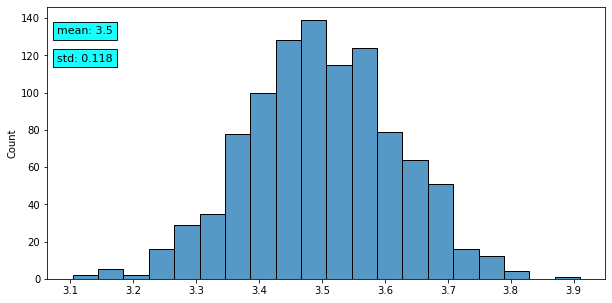

In [49]:
plt.rcParams['figure.figsize'] = (10.0,5.0)
hst_2 = sns.histplot(traj_2.mean(axis = 1) ,bins=20)
mean_t_2 =round(traj_2.mean(axis = 1).mean(),3)
std_t_2 = round(traj_2.mean(axis = 1).std(),3)
x_min,x_max=hst_2.get_xlim()
y_min,y_max=hst_2.get_ylim()
plt.text(x_min*1.005, y_max-y_max/5,f'std: {std_t_2}' ,color='black',size=11, bbox=dict(facecolor='cyan', alpha=0.9))
plt.text(x_min*1.005, y_max-y_max/10,f'mean: {mean_t_2}' ,color='black',size=11, bbox=dict(facecolor='cyan', alpha=0.9))
print("***The distribution tends to Normal Distribution***")

#### 4.C
Draw normal fit curves on your two histograms.

Text(3.0790184999999997, 131.355, 'mean: 3.5')

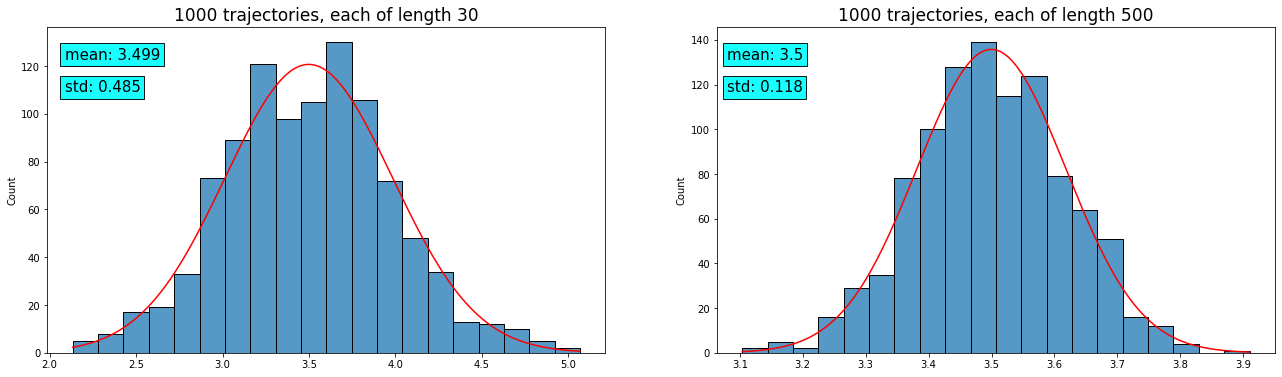

In [50]:
fig, ax = plt.subplots(1,2, figsize=(22,6))
hst_1 = sns.histplot(traj_1.mean(axis = 1) ,bins=20,ax = ax[0])
hst_2 = sns.histplot(traj_2.mean(axis = 1) ,bins=20,ax = ax[1])
ax[0].set_title("1000 trajectories, each of length 30",fontsize = 17)
ax[1].set_title("1000 trajectories, each of length 500",fontsize = 17)
f_1 = np.linspace(traj_1.mean(axis = 1).min(), traj_1.mean(axis = 1).max(), 1000)
f_1_f = stats.norm.pdf(f_1,loc = traj_1.mean(axis = 1).mean(),scale = traj_1.mean(axis = 1).std())
bin_width_1 = (traj_1.mean(axis = 1).max() - traj_1.mean(axis = 1).min()) / 20 

f_2 = np.linspace(traj_2.mean(axis = 1).min(), traj_2.mean(axis = 1).max(), 1000)
f_2_f = stats.norm.pdf(f_2,loc = traj_2.mean(axis = 1).mean(),scale = traj_2.mean(axis = 1).std())
bin_width_2 = (traj_2.mean(axis = 1).max() - traj_2.mean(axis = 1).min()) / 20 

ax[0].plot(f_1, f_1_f* 1000 * bin_width_1,color ='r')
ax[1].plot(f_2, f_2_f* 1000 * bin_width_2,color ='r')

x_min,x_max=hst_1.get_xlim()
y_min,y_max=hst_1.get_ylim()
ax[0].text(x_min*1.05, y_max-y_max/5,f'std: {std_t_1}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
ax[0].text(x_min*1.05, y_max-y_max/10,f'mean: {mean_t_1}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))

x_min,x_max=hst_2.get_xlim()
y_min,y_max=hst_2.get_ylim()
ax[1].text(x_min*1.005, y_max-y_max/5,f'std: {std_t_2}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
ax[1].text(x_min*1.005, y_max-y_max/10,f'mean: {mean_t_2}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

$$𝐶𝑜𝑣(𝑋_0,𝑋_𝑖) = E[xy]- E[x]E[y]$$
$$ E[x] = E[y] = 3.5 $$

In [51]:
def calc_cov(T):
    mt = pd.DataFrame(T,columns = [1,2,3,4,5,6],index = [1,2,3,4,5,6])
    exy = 0
    cov = dict()
    for k in range(1,501):
        h = np.linalg.matrix_power(mt.to_numpy(), k)
        trans_t = pd.DataFrame(h,columns = [1,2,3,4,5,6],index = [1,2,3,4,5,6])
        for i in range(1,7):
            for j in range(1,7):
                exy+= i*j*trans_t[i][j]
        exy/= h.sum()
        cov['Cov(X_0,X_{0})'.format(k)] = exy - 3.5**2
        exy = 0
    return cov
calc_cov(T)

{'Cov(X_0,X_1)': 1.1166666666666671,
 'Cov(X_0,X_2)': 0.5166666666666639,
 'Cov(X_0,X_3)': 0.2526666666666664,
 'Cov(X_0,X_4)': 0.12546666666666972,
 'Cov(X_0,X_5)': 0.06258666666666635,
 'Cov(X_0,X_6)': 0.031266666666668996,
 'Cov(X_0,X_7)': 0.01562826666666517,
 'Cov(X_0,X_8)': 0.007813146666668658,
 'Cov(X_0,X_9)': 0.003906378666664878,
 'Cov(X_0,X_10)': 0.001953150666667014,
 'Cov(X_0,X_11)': 0.0009765676266688672,
 'Cov(X_0,X_12)': 0.0004882822746665738,
 'Cov(X_0,X_13)': 0.0002441408298636816,
 'Cov(X_0,X_14)': 0.00012207035346278872,
 'Cov(X_0,X_15)': 6.103516443900503e-05,
 'Cov(X_0,X_16)': 3.051757976635372e-05,
 'Cov(X_0,X_17)': 1.525878938934966e-05,
 'Cov(X_0,X_18)': 7.629394595198846e-06,
 'Cov(X_0,X_19)': 3.8146972816122116e-06,
 'Cov(X_0,X_20)': 1.9073486363652137e-06,
 'Cov(X_0,X_21)': 9.536743217353205e-07,
 'Cov(X_0,X_22)': 4.768371599794818e-07,
 'Cov(X_0,X_23)': 2.3841858087791934e-07,
 'Cov(X_0,X_24)': 1.192092913271381e-07,
 'Cov(X_0,X_25)': 5.960464655174746e-08,

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [52]:
means = [0, 0]  
covs =  np.array([[2,3],[3,5]])
m = np.random.multivariate_normal(means, covs, 10**7).T

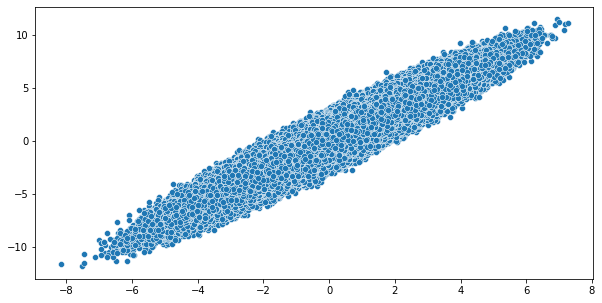

In [53]:
sns.scatterplot(x = m[0],y=m[1])

In [54]:
start = time.time()
tau = stats.kendalltau(m[0],m[1])[0] #calculation kendall tau
end = time.time()
diff_time = end - start
print("𝜏(𝑋,𝑌) = {:.4f}\nThe calculation took {:.2f} seconds".format(tau,diff_time))

𝜏(𝑋,𝑌) = 0.7951
The calculation took 5.48 seconds


#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [55]:
ind = np.random.randint(0,len(m[0]), 1000)
u = m[0][ind]
v = m[1][ind]
tau_uv = stats.kendalltau(u,v)[0] #calculation kendall tau
print("𝜏(U,V) = {:.4f}".format(tau_uv))

𝜏(U,V) = 0.7972


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?


Mean = 0.7953
 std = 0.0068


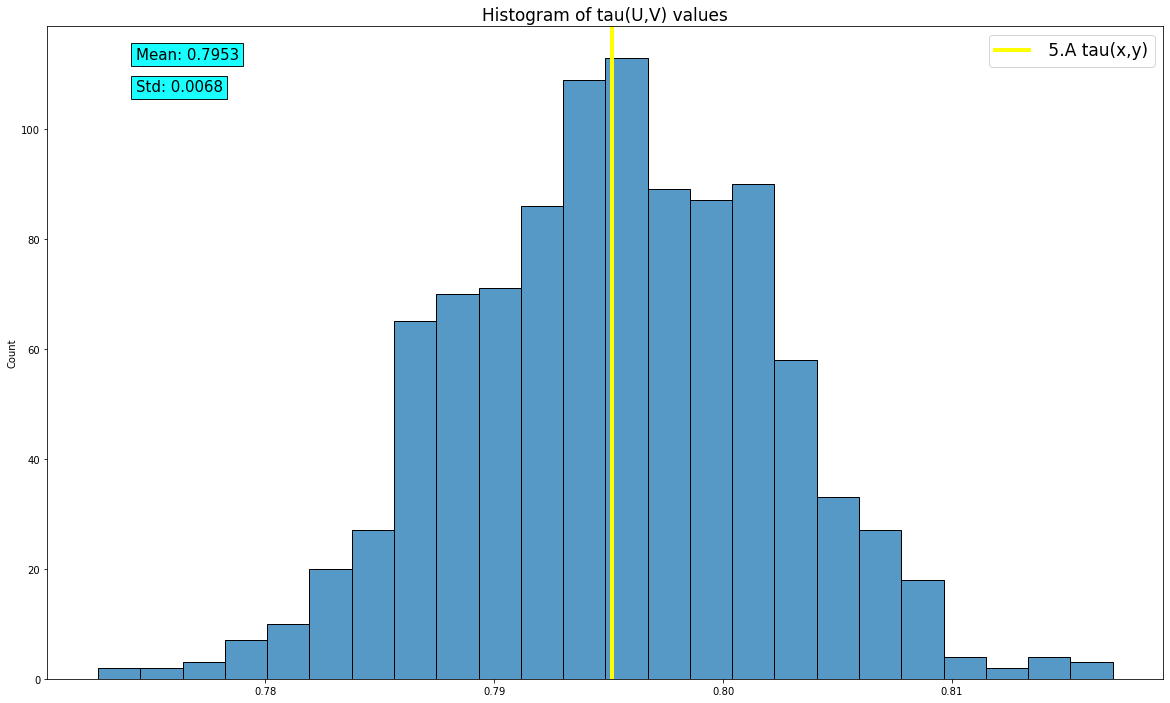

In [56]:
figsize=(10, 30)
t_samp = np.zeros((1000))
for i in tqdm(range(1000)):
    ind = np.random.randint(0,len(m[0]), 1000)
    u = m[0][ind]
    v = m[1][ind]
    t_samp[i] = stats.kendalltau(u,v)[0]
print("Mean = {:.4f}\n std = {:.4f}".format(t_samp.mean(),t_samp.std()))
fig, axes = plt.subplots(1,1, figsize=(20,12))
hs=sns.histplot(t_samp,ax=axes)
axes.set_title("Histogram of tau(U,V) values",fontsize=17)
plt.axvline(tau, color="yellow",  label=" 5.A tau(x,y)",linewidth=4)
x_min,x_max=hs.get_xlim()
y_min,y_max=hs.get_ylim()
axes.text(x_min*1.005, y_max-y_max/10,f'Std: {np.round(t_samp.std(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
axes.text(x_min*1.005, y_max-y_max/20,f'Mean: {np.round(t_samp.mean(),4)}' ,color='black',size=15, bbox=dict(facecolor='cyan', alpha=0.9))
plt.legend(loc = "upper right",fontsize=17)


#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

In [57]:
def five_c(m,pts,arr = False):
    start = time.time()
    t_samp = np.zeros((1000))
    for i in range(1000):
        ind = np.random.randint(0,len(m[0]), pts)
        u = m[0][ind]
        v = m[1][ind]
        t_samp[i] = stats.kendalltau(u,v)[0]
    std = t_samp.std()
    mean = t_samp.mean()
    acc = 1-(abs(mean-tau)/tau)
    end = time.time()
    t = end - start
    if arr:
        return t_samp,t,std
    return t,std,mean,acc

pts = [10,50,100,500,1000,5000]; t =np.zeros(len(pts)); std =np.zeros(len(pts));avg = np.zeros(len(pts)); acc = np.zeros(len(pts));

for i in range(len(pts)):
    run,ssd,av,ac = five_c(m,pts[i])
    t[i]=run; std[i]=ssd;avg[i]=av;acc[i]=ac;
    

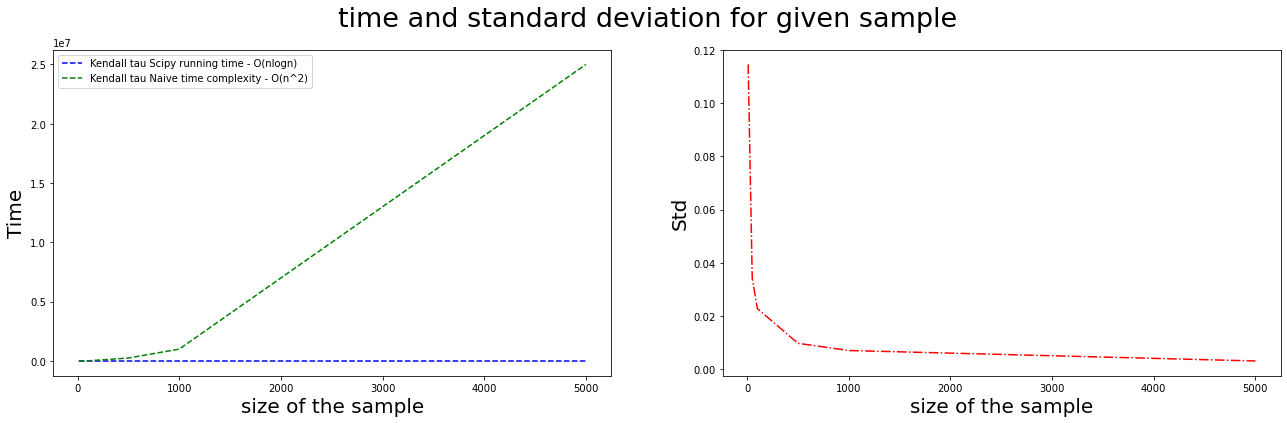

In [58]:
fig, ax = plt.subplots(1,2, figsize=(22,6))
ax[0].plot(pts,t,'--b', label ='Kendall tau Scipy running time - O(nlogn)')
ax[0].plot(pts,[item**2 for item in pts],'--g', label ='Kendall tau Naive time complexity - O(n^2)')
ax[1].plot(pts,std, '-.r', label ='standard deviation')
fig.suptitle('time and standard deviation for given sample',fontsize = 27)
ax[0].set_xlabel('size of the sample',fontsize = 20) ; ax[0].set_ylabel('Time',fontsize = 20)
ax[1].set_xlabel('size of the sample',fontsize = 20) ; ax[1].set_ylabel('Std',fontsize = 20)
ax[0].legend()


In [59]:
d = {'Kendal_Tau': avg, 'Std': std, 'Accuracy': acc, 'Time Complexity': [item**2 for item in pts]}
df_k = pd.DataFrame(data = d,index = pts)
df_k = df_k.style.format({'Accuracy': '{:,.3%}'})
df_k

,Kendal_Tau,Std,Accuracy,Time Complexity
10,0.792356,0.114494,99.650%,100
50,0.796196,0.034281,99.867%,2500
100,0.795576,0.022812,99.945%,10000
500,0.794729,0.009733,99.948%,250000
1000,0.794926,0.007033,99.973%,1000000
5000,0.794993,0.003103,99.981%,25000000


#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

#### Answer:
our null hypothesis $H_0$ is as follows: the "Kendall_data.csv"  is origined from the same population as the data is section 5.A

we will use $\mu_{100} , \sigma_{100}$. and with CLT we will say that the distribution tendד to normal.

Now, the  significance level of left and right tails of the normal distributions will be given by CDF:
$$\alpha = 2 \cdot \large \Phi (\frac{\tau_{"kendall-data.csv"} - \mu_{100}}{\sigma_{100}})$$

so the confidence level of  rejecting the coleague's claim will be $\large 1 - \alpha$ 

In [60]:
data = pd.read_csv("Kendall_data.csv",header=None)
d =np.zeros((2,data[0].shape[0]))
d[0] = data[0].to_numpy(); d[1] = data[1].to_numpy()
tau_data = stats.kendalltau(d[0],d[1])[0]
miu = avg[2] # miu is kendall tau mean for  100 samples for the given data in 5.A
stde = std[2]  # stde is kendall tau std for  100 samples for the given data in 5.A

In [61]:
tau_data , miu , stde

(0.7806556689451707, 0.7955757166737083, 0.022811916929764135)

In [62]:
alpha = 2*stats.norm.cdf((tau_data-miu)/stde) 
confidance = (1 - alpha)*100
confidance
print("We can say that H0 will be rejected with  {:.5f}% confidence".format(confidance))

We can say that H0 will be rejected with  48.69180% confidence
